<h1> Visualization - Understanding our cleaned data </h1>

<h2> Preliminary Steps </h2>

Let's begin with importing the necessary libraries:

In [14]:
pip install pygal

     ------------------------------------ 129.4/129.4 kB 845.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [19]:
import pickle
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import seaborn as sns
import pygal
from pygal.style import Style
from collections import Counter
from sklearn.decomposition import PCA
from IPython.display import SVG
import numpy as np
import seaborn as sb
%matplotlib inline
import json
import warnings
warnings.filterwarnings("ignore")

For this step, we need to load the dataframe we cleaned in the Data Handling step:

In [2]:
df = pd.read_csv('Merged_Numerical.csv')

df.head()

,DAY,MONTH,YEAR,DAY OF WEEK,FROM,TO,AIRCRAFT,MODEL,AGE,FLIGHT TIME,STD,ATD,STA,ATA,DIFFERENCE
0,5,5,2023,6,56,18,2652,50,19,31,885,933,970,964,-6.0
1,5,5,2023,6,386,56,2652,50,19,121,750,803,804,864,60.0
2,3,5,2023,4,376,386,2652,50,19,104,450,504,617,668,51.0
3,3,5,2023,4,18,376,2652,50,19,22,360,393,384,415,31.0
4,30,4,2023,1,316,18,2652,50,19,288,885,885,1354,1354,0.0


<h2>The Process</h2>
In this step we will draw conclusions about our data, before creating training a machine learning model on it.

<h2>1) One-Dimensional Visualizations</h2>
In this section we wll display visualization of our 'DIFFERENCE' column to understand how the difference entries are divided between their values:

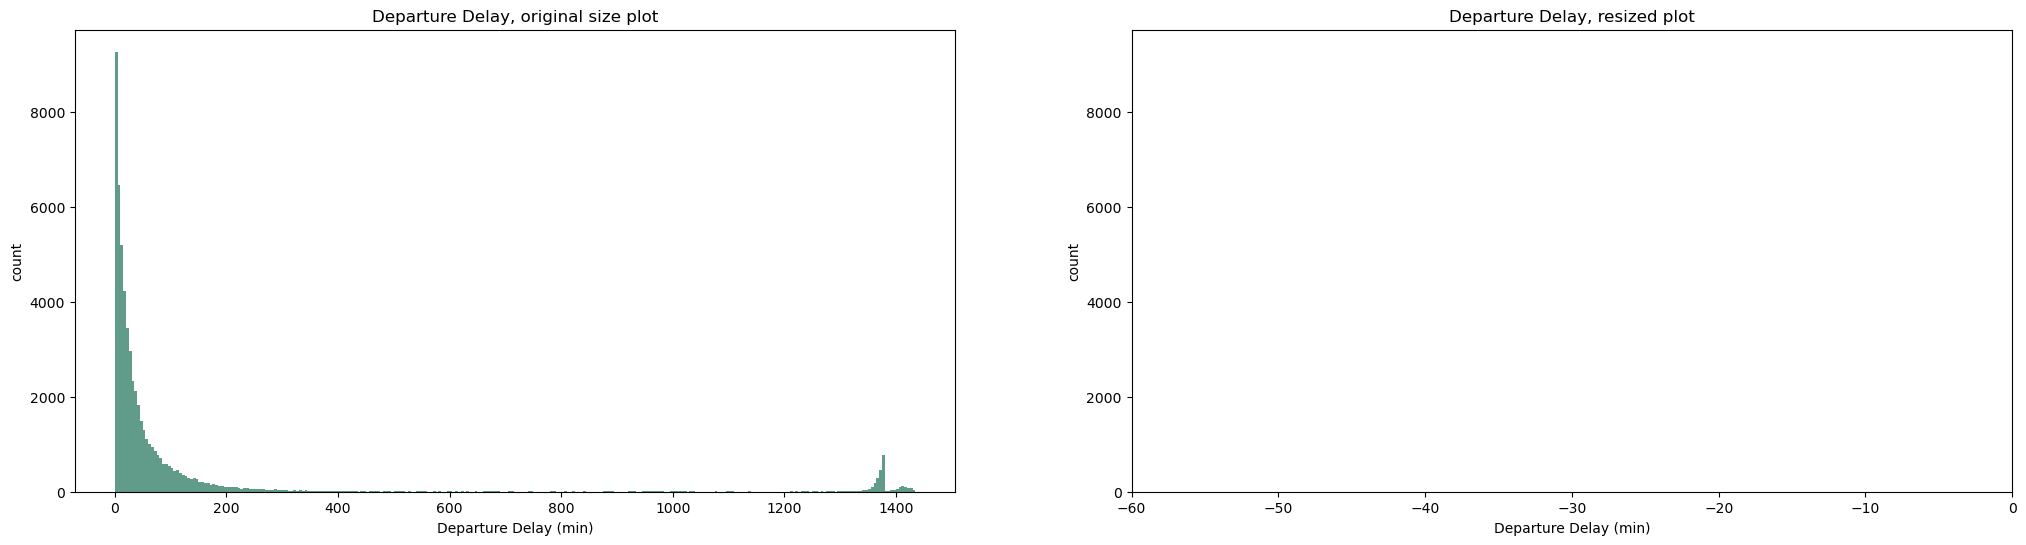

In [3]:
# Define basic color for exploration plots
color = '#619b8a'

# Plot DIFFERNCE
binsize = 5
bins = np.arange(0, df['DIFFERENCE'].max()+binsize, binsize)

plt.figure(figsize = [25, 6])

# standart plot
plt.subplot(1, 2, 1) 
plt.hist(data = df, x='DIFFERENCE', bins=bins, color=color)
plt.xlabel('Departure Delay (min)')
plt.ylabel('count')
plt.title('Departure Delay, original size plot')

# resized plot
plt.subplot(1, 2, 2)
plt.hist(data = df, x = 'DIFFERENCE', bins=bins, color=color)
plt.xlabel('Departure Delay (min)')
plt.ylabel('count')
plt.xlim((-60,0))
plt.title('Departure Delay, resized plot');
plt.show()

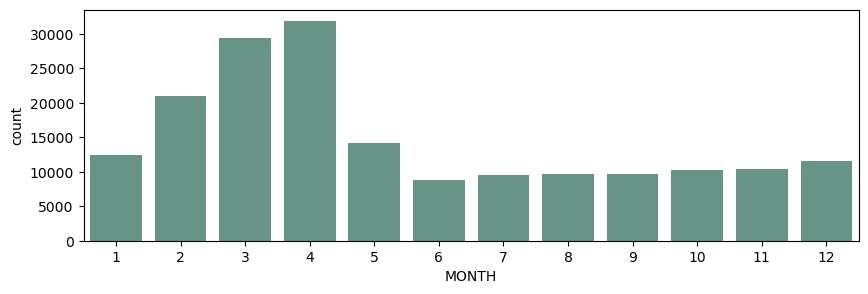

In [4]:
plt.figure(figsize = [10, 3])
sb.countplot(data=df, x='MONTH', color=color);

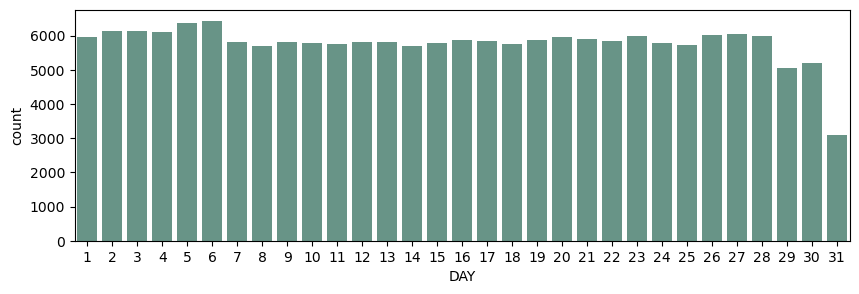

In [5]:
plt.figure(figsize = [10, 3])
sb.countplot(data=df, x='DAY', color=color);

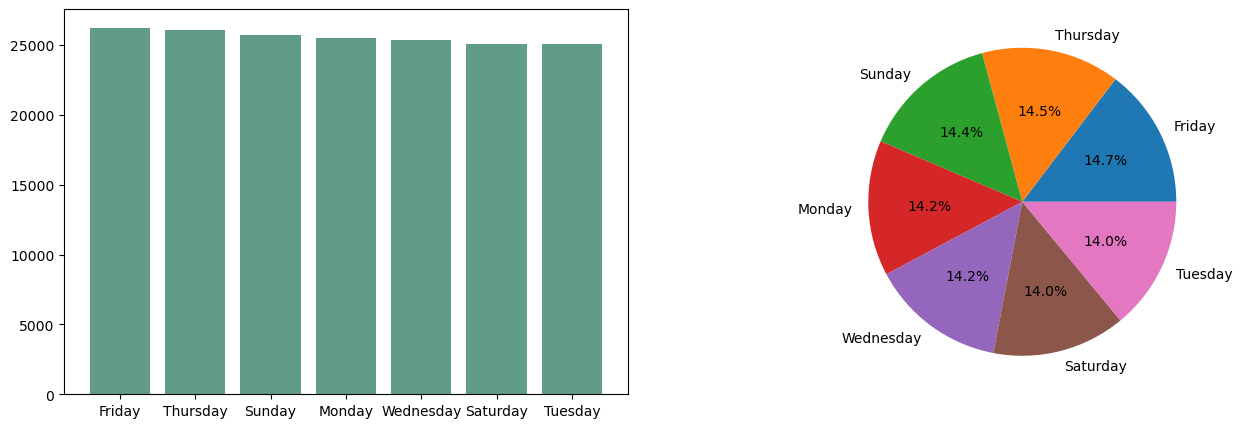

In [7]:
# order = [1, 2, 3, 4, 5, 6, 7]
values = df['DAY OF WEEK'].value_counts()
value_list = values.values.tolist()
WeekDayNames = ['Friday', 'Thursday','Sunday', 'Monday', 'Wednesday', 'Saturday', 'Tuesday']
fig, graph = plt.subplots(1,2, figsize = (16, 5))
graph[0].bar(WeekDayNames, value_list, color=color)
graph[1].pie(values.values, labels=WeekDayNames, autopct='%1.1f%%')
fig.show()




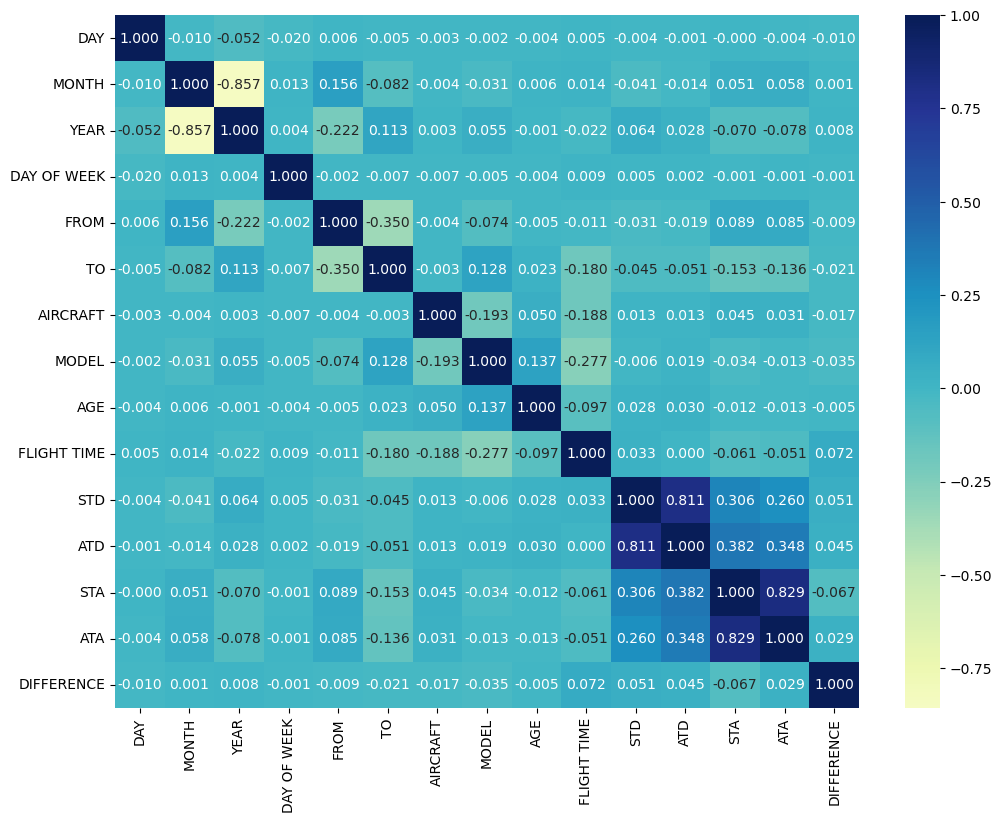

In [8]:
# Plot heatmap of numeric features

numeric_vars = ['DAY', 'MONTH', 'YEAR', 'DAY OF WEEK', 'FROM', 'TO', 'AIRCRAFT', 'MODEL', 'AGE', 'FLIGHT TIME', 'STD', 'ATD', 'STA', 'ATA', 'DIFFERENCE']

plt.figure(figsize = [12, 9])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'YlGnBu', center = 0)
plt.show()


In [9]:
# Prepare dataset to plot reasons of delay as categories

month_delays = df.groupby('MONTH').mean().reset_index()
tdrop = ['YEAR', 'DAY', 'DAY OF WEEK', 'DIFFERENCE']
month_delays = month_delays.drop(tdrop, axis=1)
month_delays['MONTH'] = month_delays['MONTH'].astype(str).str.zfill(2)

month_tidy = month_delays.melt(id_vars='MONTH').sort_values('MONTH')

Two dimensional:

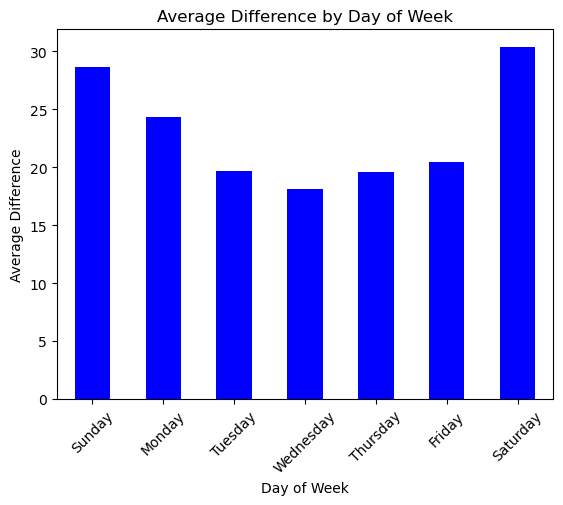

In [15]:
days_list = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

average_diff = df.groupby('DAY OF WEEK')['DIFFERENCE'].mean()

# Plot the average difference
ax = average_diff.plot(kind='bar', color='blue')

# Customize the plot
ax.set_xlabel('Day of Week')
ax.set_ylabel('Average Difference')
ax.set_title('Average Difference by Day of Week')
ax.set_xticklabels(days_list, rotation=45)

# Display the plot
plt.show()


We can see that the days with most vurnerable days for delays are sunday and saturday

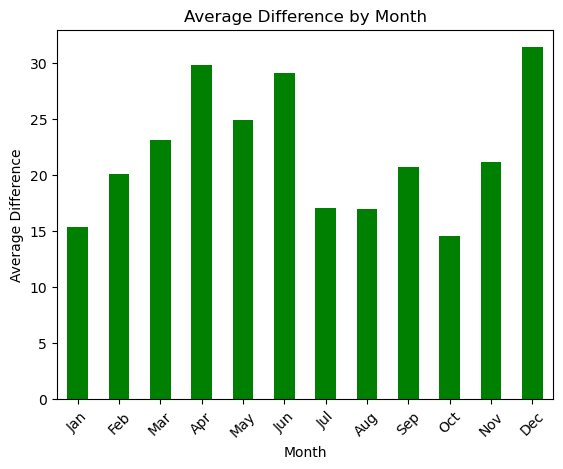

In [16]:
average_diff = df.groupby('MONTH')['DIFFERENCE'].mean()

# Define custom month labels
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot the average difference
ax = average_diff.plot(kind='bar', color='green')

# Customize the plot
ax.set_xlabel('Month')
ax.set_ylabel('Average Difference')
ax.set_title('Average Difference by Month')
ax.set_xticklabels(months, rotation=45)

# Display the plot
plt.show()

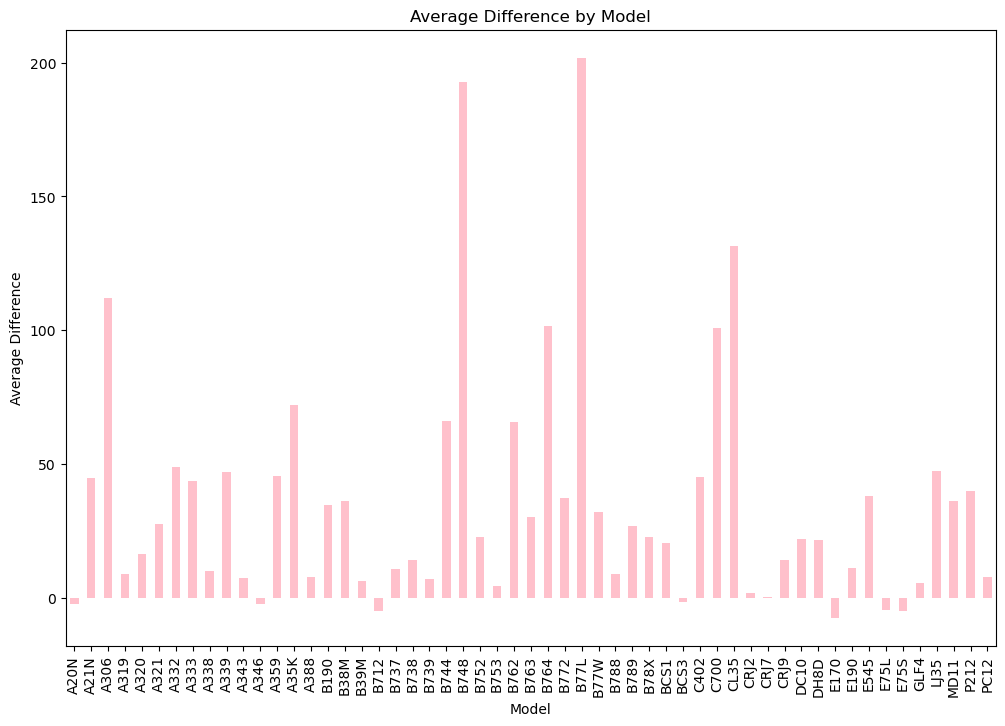

In [25]:



with open("model_dict.txt", "r") as file:
    model_dict = json.load(file)

keys_list = list(model_dict.keys())

average_diff = df.groupby('MODEL')['DIFFERENCE'].mean()

plt.figure(figsize=(12, 8))

# Plot the average difference
ax = average_diff.plot(kind='bar', color='pink')

# Customize the plot
ax.set_xlabel('Model')
ax.set_ylabel('Average Difference')
ax.set_title('Average Difference by Model')
ax.set_xticklabels(keys_list, rotation=90)

# Display the plot
plt.show()


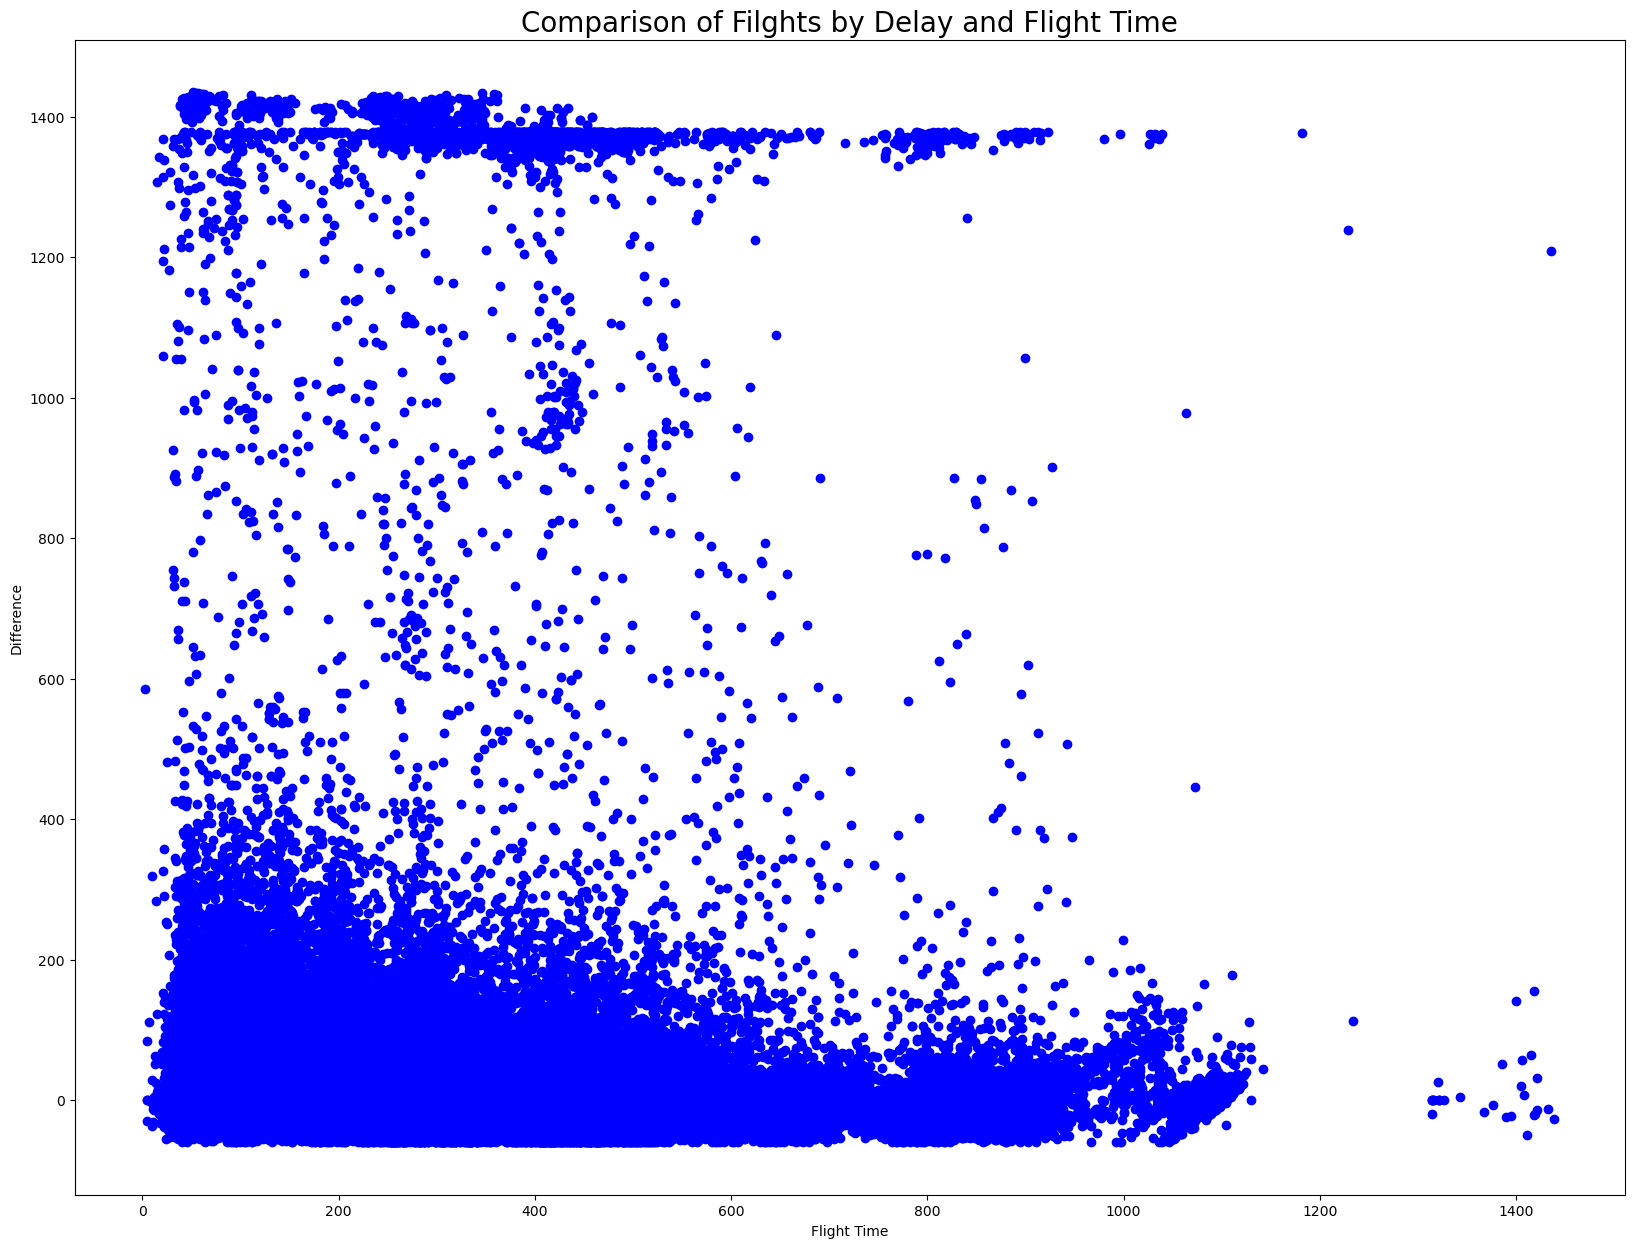

In [33]:
scat = plt.figure(figsize=(20,15))
plt.title("Comparison of Filghts by Delay and Flight Time", fontsize=20)
plt.scatter(df['FLIGHT TIME'], df['DIFFERENCE'], c='blue')
plt.xlabel("Flight Time")
plt.ylabel('Difference')
plt.show()

we can see that the longer the flight , the smaller the difference